## **Preposessing Dataset Testing**

---

Dataset tweet berasal dari penelitian: [Emotion dataset from Indonesian public opinion](https://www.sciencedirect.com/science/article/pii/S2352340922006588?via%3Dihub)

Dataset                              : [link Dataset](https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion)

## Installing Package

In [7]:
! pip install sastrawi

## Import Library

In [8]:
import pandas
import numpy
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import warnings
warnings.filterwarnings("ignore")

# Load Data Testing

### Selected Colums

In [9]:
selected_columns = ["full_text", "username"]

In [10]:
from_sociallabs = pandas.read_csv("../Dataset/Testing/Raw/socialab.tweets.csv", usecols=selected_columns)
from_sociallabs

full_text        username
0      @m_nurfatoni Anies seperti Ahmad Dahlan jamam now       meditegal
1      @ardibhironx Itu ide AHOK dan udah dijalankan....   AnonimousNama
2      @bagaskara645y @logikapolitikid Anies sama Pra...     RivaldiFaza
3      pernyataan di depan para pendukungnya. Semoga ...       eva_aruna
4      @BangPino__ Pemilih Anies militan tak tergiur ...       meditegal
...                                                  ...             ...
28966  #Cek Bisa COD BELI 1 DAPAT 2 #Dreamy #Sweet #M...    dosopriyanto
28967  ลองดู [COD] Flash Sale 1กิโล แมคคายกกระสอบ ตุ๊...  Floraa72270993
28968          wal cod an shopee kawa pakai qris lah yuu      banjarbase
28969  Temukan [BS] BISA COD Light Stick TREASURE BLU...   RacunShopee35
28970  wts / want to sell INA lfb Postcard chill kill...      kangsitwar

[28971 rows x 2 columns]

In [11]:
testing_data = pandas.concat([from_sociallabs])
testing_data.reset_index(inplace=True,drop=True)
testing_data

full_text        username
0      @m_nurfatoni Anies seperti Ahmad Dahlan jamam now       meditegal
1      @ardibhironx Itu ide AHOK dan udah dijalankan....   AnonimousNama
2      @bagaskara645y @logikapolitikid Anies sama Pra...     RivaldiFaza
3      pernyataan di depan para pendukungnya. Semoga ...       eva_aruna
4      @BangPino__ Pemilih Anies militan tak tergiur ...       meditegal
...                                                  ...             ...
28966  #Cek Bisa COD BELI 1 DAPAT 2 #Dreamy #Sweet #M...    dosopriyanto
28967  ลองดู [COD] Flash Sale 1กิโล แมคคายกกระสอบ ตุ๊...  Floraa72270993
28968          wal cod an shopee kawa pakai qris lah yuu      banjarbase
28969  Temukan [BS] BISA COD Light Stick TREASURE BLU...   RacunShopee35
28970  wts / want to sell INA lfb Postcard chill kill...      kangsitwar

[28971 rows x 2 columns]

In [12]:
testing_data.to_excel('../Dataset/Preposessing/Testing/sebelum_preposessing3.xlsx')

ModuleNotFoundError: No module named 'openpyxl'

# EDA

Sebelum melakukan preprossing pada data, akan dilakukan eda secara singkat untuk melihat tipe data dan null values pada data.

In [ ]:
eda_data = testing_data.copy()

## Null Values

In [ ]:
print("Null Values:")
eda_data.isna().sum()

Null Values:


full_text    0
username     0
dtype: int64

## Data Types

In [ ]:
print("Data Types:")
eda_data.info()

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  963 non-null    object
 1   username   963 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


## Label Proportion

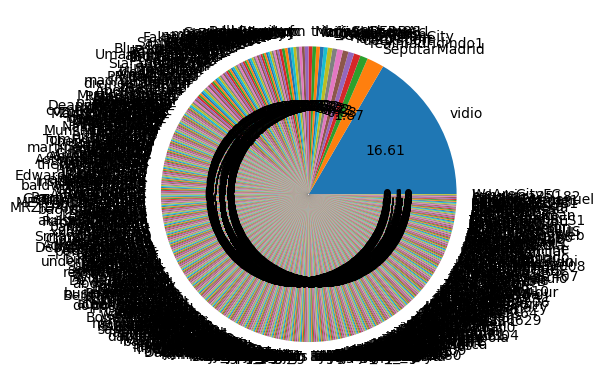

In [ ]:
fig = plt.Figure(figsize=(25,25))
plt.pie(eda_data["username"].value_counts().values,
        labels=eda_data["username"].value_counts().index,
        autopct='%.2f')
plt.show()

Netral memiliki lebih banyak data dibandingkan label yang lain. 

## Data Distribution

In [ ]:
eda_data['Length'] = eda_data['full_text'].str.len()
eda_data.head(10)

full_text         username  Length
0  @RoxasDepp @jay_Hainen Aku yakin actually Man ...           amdjfr     160
1  @WTEFPL @KhairilAnuar Lahhhh tak baik taw ckp ...       Fizhanmtdn     118
2  @buat_gaming @utdabout FA ada man city kalo Ch...        eupatreat      80
3                      @beagleblueF1 @ManCity Rodri       Ritvars95LV      29
4  Malam ganjil. Gol ganjil Assalamualaikum piala...      abdanahmadd     104
5  Cole Palmer ngebet pindah dari @ManCity ke @Ch...  kopibukudanpena     118
6  Lihat statistik top score EPL ternyata cold Pa...    tejoharizola_     114
7  @keywai_ Plg susah arsenal. Easiest run in man...   MSallehuddin05     181
8  COLD PALMER Semenjak Man City lepas dia gue ud...       PunditNdut     254
9          @ahkirey gue mancity sama arsenal hahaha.        raedfield      41

In [ ]:
print(f"Rata-rata panjang karakter tweet : {eda_data['Length'].mean():.2f}")

Rata-rata panjang karakter tweet : 123.17


In [ ]:
print(f"Jumlah panjang karakter tweet  : {eda_data['Length'].sum():.2f}")

Jumlah panjang karakter tweet  : 118617.00


In [ ]:
def word_count(tweet):
    tweet_list = tweet.split()
    return len(tweet_list)

In [ ]:
eda_data['Word_count'] = eda_data['full_text'].apply(word_count)
eda_data.head(10)

full_text         username  Length  \
0  @RoxasDepp @jay_Hainen Aku yakin actually Man ...           amdjfr     160   
1  @WTEFPL @KhairilAnuar Lahhhh tak baik taw ckp ...       Fizhanmtdn     118   
2  @buat_gaming @utdabout FA ada man city kalo Ch...        eupatreat      80   
3                      @beagleblueF1 @ManCity Rodri       Ritvars95LV      29   
4  Malam ganjil. Gol ganjil Assalamualaikum piala...      abdanahmadd     104   
5  Cole Palmer ngebet pindah dari @ManCity ke @Ch...  kopibukudanpena     118   
6  Lihat statistik top score EPL ternyata cold Pa...    tejoharizola_     114   
7  @keywai_ Plg susah arsenal. Easiest run in man...   MSallehuddin05     181   
8  COLD PALMER Semenjak Man City lepas dia gue ud...       PunditNdut     254   
9          @ahkirey gue mancity sama arsenal hahaha.        raedfield      41   

   Word_count  
0          25  
1          21  
2          13  
3           3  
4          11  
5          16  
6          15  
7          33  
8          43  
9           6

In [ ]:
print(f"Jumlah kata : {eda_data['Word_count'].sum():.2f}")

Jumlah kata : 17174.00


In [ ]:
print(f"Rata-rata jumlah kata : {eda_data['Word_count'].mean():.2f}")

Rata-rata jumlah kata : 17.83


In [ ]:
eda_data['mean_word_length'] = eda_data['full_text'].map(lambda rev: numpy.mean([len(word) for word in rev.split()]))
eda_data.head(10)

full_text         username  Length  \
0  @RoxasDepp @jay_Hainen Aku yakin actually Man ...           amdjfr     160   
1  @WTEFPL @KhairilAnuar Lahhhh tak baik taw ckp ...       Fizhanmtdn     118   
2  @buat_gaming @utdabout FA ada man city kalo Ch...        eupatreat      80   
3                      @beagleblueF1 @ManCity Rodri       Ritvars95LV      29   
4  Malam ganjil. Gol ganjil Assalamualaikum piala...      abdanahmadd     104   
5  Cole Palmer ngebet pindah dari @ManCity ke @Ch...  kopibukudanpena     118   
6  Lihat statistik top score EPL ternyata cold Pa...    tejoharizola_     114   
7  @keywai_ Plg susah arsenal. Easiest run in man...   MSallehuddin05     181   
8  COLD PALMER Semenjak Man City lepas dia gue ud...       PunditNdut     254   
9          @ahkirey gue mancity sama arsenal hahaha.        raedfield      41   

   Word_count  mean_word_length  
0          25          5.440000  
1          21          4.666667  
2          13          5.230769  
3           3          8.666667  
4          11          8.545455  
5          16          6.437500  
6          15          6.666667  
7          33          4.515152  
8          43          4.930233  
9           6          6.000000

In [ ]:
eda_data['mean_sent_length'] = eda_data['full_text'].map(lambda rev: numpy.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
eda_data.head(10)

full_text         username  Length  \
0  @RoxasDepp @jay_Hainen Aku yakin actually Man ...           amdjfr     160   
1  @WTEFPL @KhairilAnuar Lahhhh tak baik taw ckp ...       Fizhanmtdn     118   
2  @buat_gaming @utdabout FA ada man city kalo Ch...        eupatreat      80   
3                      @beagleblueF1 @ManCity Rodri       Ritvars95LV      29   
4  Malam ganjil. Gol ganjil Assalamualaikum piala...      abdanahmadd     104   
5  Cole Palmer ngebet pindah dari @ManCity ke @Ch...  kopibukudanpena     118   
6  Lihat statistik top score EPL ternyata cold Pa...    tejoharizola_     114   
7  @keywai_ Plg susah arsenal. Easiest run in man...   MSallehuddin05     181   
8  COLD PALMER Semenjak Man City lepas dia gue ud...       PunditNdut     254   
9          @ahkirey gue mancity sama arsenal hahaha.        raedfield      41   

   Word_count  mean_word_length  mean_sent_length  
0          25          5.440000             79.50  
1          21          4.666667            118.00  
2          13          5.230769             80.00  
3           3          8.666667             28.00  
4          11          8.545455             51.50  
5          16          6.437500            118.00  
6          15          6.666667             56.50  
7          33          4.515152             44.50  
8          43          4.930233             62.75  
9           6          6.000000             41.00

In [ ]:
def visualize(col):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=eda_data[col], hue=eda_data['username'])
    plt.ylabel(col, labelpad=12.5)
    plt.title(col)

    plt.subplot(1, 2, 2)
    sns.displot(eda_data, x=col, kind="kde", hue='username', rug=True)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(col)

    plt.tight_layout()
    plt.show()

In [ ]:
#features = eda_data.columns.tolist()[2:]
#for feature in features:
    #visualize(feature)

# Preprocessing

In [ ]:
kamus_singkatan = pandas.read_csv("./Dataset/kamus_singkatan.csv",names=["kata_gaul","kata_asal"],delimiter=",")
kamus_singkatan

kata_gaul kata_asal
0         awal     akhir
1       aamiin     amin 
2         adek     adik 
3         adlh   adalah 
4          aer      air 
...        ...       ...
1305       yoi       iya
1306       yup       ya 
1307      yups        ya
1308      yupz        ya
1309      ywdh  ya sudah

[1310 rows x 2 columns]

In [ ]:
def create_kamus():
      kamus = {}
      for i in range(len(kamus_singkatan)):
          kamus[kamus_singkatan["kata_gaul"][i]]=kamus_singkatan["kata_asal"][i].lower().strip()
      return kamus

In [ ]:
kamus = create_kamus()
kamus

{'awal': 'akhir',
 'aamiin': 'amin',
 'adek': 'adik',
 'adlh': 'adalah',
 'aer': 'air',
 'aiskrim': 'es krim',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'ajalah': 'saja',
 'aje': 'saja',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan',
 'ama': 'sama',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur',
 'ane': 'saya',
 'anget': 'hangat',
 'anjeng': 'anjing',
 'ank': 'anak',
 'apah': 'apa',
 'aph': 'apa',
 'apo': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya',
 'asek': 'asik',
 'ati2': 'hati-hati',
 'atit': 'sakit',
 'atu': 'satu',
 'atw': 'atau',
 'ayang': 'sayang',
 'ayuk': 'ayo',
 'babang': 'abang',
 'bae': 'baik',
 'bais': 'habis',
 'bakalan': 'akan',
 'bales': 'balas',
 'bandingin': 'bandingkan',
 'banget': 'sekali',
 'bangett': 'sangat',
 'banyakin': 'perbanyak',
 'barengan': 'bersamaan',
 'baryaw': 'sabar ya',
 'baso': 'bakso',
 'bay': 'selamat tinggal',
 'bbrp': 'bebera

## Case Folding

### Lowercase

In [ ]:
def tweet_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [ ]:
print("Sebelum Lower Case:\nIni ADAlah Kalimat Testing yAaAaA!")
print()
print(f"Sesudah Lower Case:\n{tweet_lowercase('Ini ADAlah Kalimat Testing yAaAaA!')}")

Sebelum Lower Case:
Ini ADAlah Kalimat Testing yAaAaA!

Sesudah Lower Case:
ini adalah kalimat testing yaaaaa!


#### Sebelum

In [ ]:
testing_data.head()

full_text     username
0  @RoxasDepp @jay_Hainen Aku yakin actually Man ...       amdjfr
1  @WTEFPL @KhairilAnuar Lahhhh tak baik taw ckp ...   Fizhanmtdn
2  @buat_gaming @utdabout FA ada man city kalo Ch...    eupatreat
3                      @beagleblueF1 @ManCity Rodri   Ritvars95LV
4  Malam ganjil. Gol ganjil Assalamualaikum piala...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_casefolding.xlsx')

#### Implementasi

In [ ]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_lowercase)

CPU times: user 1.37 ms, sys: 110 µs, total: 1.48 ms
Wall time: 1.32 ms


#### Sesudah

In [ ]:
testing_data.head(10)

full_text         username
0  @roxasdepp @jay_hainen aku yakin actually man ...           amdjfr
1  @wtefpl @khairilanuar lahhhh tak baik taw ckp ...       Fizhanmtdn
2  @buat_gaming @utdabout fa ada man city kalo ch...        eupatreat
3                      @beaglebluef1 @mancity rodri       Ritvars95LV
4  malam ganjil. gol ganjil assalamualaikum piala...      abdanahmadd
5  cole palmer ngebet pindah dari @mancity ke @ch...  kopibukudanpena
6  lihat statistik top score epl ternyata cold pa...    tejoharizola_
7  @keywai_ plg susah arsenal. easiest run in man...   MSallehuddin05
8  cold palmer semenjak man city lepas dia gue ud...       PunditNdut
9          @ahkirey gue mancity sama arsenal hahaha.        raedfield

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_casefolding.xlsx')

## Cleansing

### Menghapus username

In [ ]:
def tweet_delete_username(tweet):
    userPattern       = '@[^\s]+'
    # Ngehapus kata "username" 
    tweet = re.sub(userPattern, '', tweet)
    
    return tweet

In [ ]:
print("Sebelum:\n@Angel_siregar sebenernya aku suka sama kamu dulu, tapi kamu ternyata berubah")
print()
print(f"Setelah:\n{tweet_delete_username('@Angel_siregar sebenernya aku suka sama kamu dulu, tapi kamu ternyata berubah')}")

Sebelum:
@Angel_siregar sebenernya aku suka sama kamu dulu, tapi kamu ternyata berubah

Setelah:
 sebenernya aku suka sama kamu dulu, tapi kamu ternyata berubah


#### Sebelum

In [ ]:
testing_data.head()

full_text     username
0  @roxasdepp @jay_hainen aku yakin actually man ...       amdjfr
1  @wtefpl @khairilanuar lahhhh tak baik taw ckp ...   Fizhanmtdn
2  @buat_gaming @utdabout fa ada man city kalo ch...    eupatreat
3                      @beaglebluef1 @mancity rodri   Ritvars95LV
4  malam ganjil. gol ganjil assalamualaikum piala...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-hapususername.xlsx')

#### Implementasi

In [ ]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_username)

CPU times: user 1.32 ms, sys: 106 µs, total: 1.43 ms
Wall time: 1.39 ms


#### Sesudah

In [ ]:
testing_data.head()

full_text     username
0    aku yakin actually man city lobby untuk ensu...       amdjfr
1    lahhhh tak baik taw ckp chelsea tu bawahan h...   Fizhanmtdn
2    fa ada man city kalo chelsea masih ada harap...    eupatreat
3                                             rodri   Ritvars95LV
4  malam ganjil. gol ganjil assalamualaikum piala...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-hapususername.xlsx')

### Menghapus url

In [ ]:
def tweet_delete_url(tweet):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)" #Pola ngehapus url
    tweet = re.sub(urlPattern, '', tweet)
    return tweet

In [ ]:
print("Sebelum:\nhttps://www.analyticsvidhya.com/blog/2022/01/text-cleaning-methods-in-nlp/ link belajar nlp")
print()
print(f"Setelah:\n{tweet_delete_url('https://www.analyticsvidhya.com/blog/2022/01/text-cleaning-methods-in-nlp/ link belajar nlp')}")

Sebelum:
https://www.analyticsvidhya.com/blog/2022/01/text-cleaning-methods-in-nlp/ link belajar nlp

Setelah:
 link belajar nlp


#### Sebelum

In [ ]:
testing_data.head()

full_text     username
0    aku yakin actually man city lobby untuk ensu...       amdjfr
1    lahhhh tak baik taw ckp chelsea tu bawahan h...   Fizhanmtdn
2    fa ada man city kalo chelsea masih ada harap...    eupatreat
3                                             rodri   Ritvars95LV
4  malam ganjil. gol ganjil assalamualaikum piala...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-hapusurl.xlsx')

#### Implementasi

In [ ]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_url)

CPU times: user 6.68 ms, sys: 211 µs, total: 6.89 ms
Wall time: 6.78 ms


#### Sesudah

In [ ]:
testing_data.head()

full_text     username
0    aku yakin actually man city lobby untuk ensu...       amdjfr
1    lahhhh tak baik taw ckp chelsea tu bawahan h...   Fizhanmtdn
2    fa ada man city kalo chelsea masih ada harap...    eupatreat
3                                             rodri   Ritvars95LV
4  malam ganjil. gol ganjil assalamualaikum piala...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-hapusurl.xlsx')

### Menghapus kelebihan huruf

In [ ]:
def tweet_delete_extra_letters(tweet):
    sequencePattern   = r'([A-Za-z])\1{2,}' #Pola ngehapus karakter yang punya kelebihan huruf
    seqReplacePattern = r'\1' #Pola ngereplace yang kelebihan huruf tiga kali
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
    
    return tweet

In [ ]:
print("Sebelum:\nAku ganteng banget gillaaaaaa saat main gitar, manfaat banget")
print()
print(f"Sebelum:\n{tweet_delete_extra_letters('Aku ganteng banget gilllaaaaaa saat main gitar, manfaat banget')}")

Sebelum:
Aku ganteng banget gillaaaaaa saat main gitar, manfaat banget

Sebelum:
Aku ganteng banget gila saat main gitar, manfaat banget


#### Sebelum

In [ ]:
testing_data.head()

full_text     username
0    aku yakin actually man city lobby untuk ensu...       amdjfr
1    lahhhh tak baik taw ckp chelsea tu bawahan h...   Fizhanmtdn
2    fa ada man city kalo chelsea masih ada harap...    eupatreat
3                                             rodri   Ritvars95LV
4  malam ganjil. gol ganjil assalamualaikum piala...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-kelebihanhuruf.xlsx')

#### Implementasi

In [ ]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_extra_letters)

CPU times: user 7.26 ms, sys: 0 ns, total: 7.26 ms
Wall time: 7.15 ms


#### Sesudah

In [ ]:
testing_data.head()

full_text     username
0    aku yakin actually man city lobby untuk ensu...       amdjfr
1    lah tak baik taw ckp chelsea tu bawahan heba...   Fizhanmtdn
2    fa ada man city kalo chelsea masih ada harap...    eupatreat
3                                             rodri   Ritvars95LV
4  malam ganjil. gol ganjil assalamualaikum piala...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-kelebihanhuruf.xlsx')

### Menghapus Noise

In [ ]:
def tweet_delete_noise(tweet):
        tweet = re.sub(r'(asslamu alaikum|assalamualaikum|asalamualaikum|assalamu\'alaikum|Assalamu alaikum|Assalamualaikum warahmatullahi wabarakatuh|ass wr\. wb\.|ass)', '', tweet)
        tweet = re.sub(r'\b(dah|doi|dih|kok|pol|brow|emyu|skin|anjir|anjay|njir|bjir|jir|njay|anjoy|ajg|min|admin|gan|sis|sih|ke|di|dari|lah|kudu|oalah|lha|yah|yha|amp|n|nih|loo|hadeuh|waduh|sok|na|cing|hadeuh|loh|lho|bro|cui|cuy|yuk|yok|kuy|kan)\b', '', tweet)
        return tweet

In [ ]:
print("Sebelum:\njir nadin amizah cantik banget cuy, pengen jadi suaminya.")
print()
print(f"Sebelum:\n{tweet_delete_noise('jir nadin amizah cantik banget cuy, pengen jadi suaminya.')}")

Sebelum:
jir nadin amizah cantik banget cuy, pengen jadi suaminya.

Sebelum:
 nadin amizah cantik banget , pengen jadi suaminya.


#### Sebelum

In [ ]:
testing_data.head()

full_text     username
0    aku yakin actually man city lobby untuk ensu...       amdjfr
1    lah tak baik taw ckp chelsea tu bawahan heba...   Fizhanmtdn
2    fa ada man city kalo chelsea masih ada harap...    eupatreat
3                                             rodri   Ritvars95LV
4  malam ganjil. gol ganjil assalamualaikum piala...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-menghapusnoise.xlsx')

#### Implementasi

In [ ]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_noise)

CPU times: user 13 ms, sys: 0 ns, total: 13 ms
Wall time: 13.1 ms


#### Sesudah

In [ ]:
testing_data.head()

full_text     username
0    aku yakin actually man city lobby untuk ensu...       amdjfr
1     tak baik taw ckp chelsea tu bawahan hebat j...   Fizhanmtdn
2    fa ada man city kalo chelsea masih ada harap...    eupatreat
3                                             rodri   Ritvars95LV
4  malam ganjil. gol ganjil  piala inggriss ekhhe...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-menghapusnoise.xlsx')

### Menghapus new line dan new text

In [ ]:
def tweet_delete_new_line_new_text(tweet):
    tweet = re.sub(r'\\[nt]', ' ', tweet)
    return tweet

In [ ]:
print("Sebelum:\nAku ganteng banget gillaaaaaa saat main gitar, \nmanfaat\t banget")
print()
string_to_print = "Aku ganteng banget gilllaaaaaa saat main gitar, \\n manfaat\\t banget"
print(f"Setelah:\n{tweet_delete_new_line_new_text(string_to_print)}")

Sebelum:
Aku ganteng banget gillaaaaaa saat main gitar, 
manfaat	 banget

Setelah:
Aku ganteng banget gilllaaaaaa saat main gitar,   manfaat  banget


#### Sebelum

In [ ]:
testing_data.head()

full_text     username
0    aku yakin actually man city lobby untuk ensu...       amdjfr
1     tak baik taw ckp chelsea tu bawahan hebat j...   Fizhanmtdn
2    fa ada man city kalo chelsea masih ada harap...    eupatreat
3                                             rodri   Ritvars95LV
4  malam ganjil. gol ganjil  piala inggriss ekhhe...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-newline.xlsx')

#### Implementasi

In [ ]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_new_line_new_text)

CPU times: user 1.19 ms, sys: 92 µs, total: 1.28 ms
Wall time: 1.25 ms


#### Sesudah

In [ ]:
testing_data.head()

full_text     username
0    aku yakin actually man city lobby untuk ensu...       amdjfr
1     tak baik taw ckp chelsea tu bawahan hebat j...   Fizhanmtdn
2    fa ada man city kalo chelsea masih ada harap...    eupatreat
3                                             rodri   Ritvars95LV
4  malam ganjil. gol ganjil  piala inggriss ekhhe...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-newline.xlsx')

### Menghapus angka

In [ ]:
def tweet_delete_number(tweet):
    number = r'\d+' #Pola ngehapus angka
    tweet = re.sub(number, '', tweet)
    return tweet

In [ ]:
print("Sebelum:\nin242i adal1321ah kalimat2 testing 12312yaaaaa!")
print()
print(f"Sebelum:\n{tweet_delete_number('in242i adal1321ah kalimat2 testing 12312yaaaaa!')}")

Sebelum:
in242i adal1321ah kalimat2 testing 12312yaaaaa!

Sebelum:
ini adalah kalimat testing yaaaaa!


#### Sebelum

In [ ]:
testing_data.head()

full_text     username
0    aku yakin actually man city lobby untuk ensu...       amdjfr
1     tak baik taw ckp chelsea tu bawahan hebat j...   Fizhanmtdn
2    fa ada man city kalo chelsea masih ada harap...    eupatreat
3                                             rodri   Ritvars95LV
4  malam ganjil. gol ganjil  piala inggriss ekhhe...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-menghapusangka.xlsx')

#### Implementasi

In [ ]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_number)

CPU times: user 5.34 ms, sys: 0 ns, total: 5.34 ms
Wall time: 5.25 ms


#### Sesudah

In [ ]:
testing_data.head()

full_text     username
0    aku yakin actually man city lobby untuk ensu...       amdjfr
1     tak baik taw ckp chelsea tu bawahan hebat j...   Fizhanmtdn
2    fa ada man city kalo chelsea masih ada harap...    eupatreat
3                                             rodri   Ritvars95LV
4  malam ganjil. gol ganjil  piala inggriss ekhhe...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-menghapusangka.xlsx')

### Menghapus tanda baca

In [ ]:
def tweet_delete_punctuation(tweet):
    punctuationPattern = r'[^\w\s]' 
    tweet = re.sub(punctuationPattern, ' ', tweet)
    
    return tweet

In [ ]:
print("Sebelum:\neh seriusan?@pak_adang nasi padangnya enak banget gilaa! jadi pengen goyang nasi padan,g,.!!!! ehehe:)")
print()
print(f"Sebelum:\n{tweet_delete_punctuation('eh seriusan?@pak_adang nasi padangnya enak banget gilaa! jadi pengen goyang nasi padan,g,.!!!! ehehe:)')}")

Sebelum:
eh seriusan?@pak_adang nasi padangnya enak banget gilaa! jadi pengen goyang nasi padan,g,.!!!! ehehe:)

Sebelum:
eh seriusan  pak_adang nasi padangnya enak banget gilaa  jadi pengen goyang nasi padan g       ehehe  


#### Sebelum

In [ ]:
testing_data.head()

full_text     username
0    aku yakin actually man city lobby untuk ensu...       amdjfr
1     tak baik taw ckp chelsea tu bawahan hebat j...   Fizhanmtdn
2    fa ada man city kalo chelsea masih ada harap...    eupatreat
3                                             rodri   Ritvars95LV
4  malam ganjil. gol ganjil  piala inggriss ekhhe...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-menghapustandabaca.xlsx')

#### Implementasi

In [ ]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_punctuation)

CPU times: user 3.04 ms, sys: 0 ns, total: 3.04 ms
Wall time: 3 ms


#### Sesudah

In [ ]:
testing_data.head()

full_text     username
0    aku yakin actually man city lobby untuk ensu...       amdjfr
1     tak baik taw ckp chelsea tu bawahan hebat j...   Fizhanmtdn
2    fa ada man city kalo chelsea masih ada harap...    eupatreat
3                                             rodri   Ritvars95LV
4  malam ganjil  gol ganjil  piala inggriss ekhhe...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-menghapustandabaca.xlsx')

### Menghapus Extra Spasi

In [ ]:
def tweet_delete_extra_space(tweet):
    tweet = re.sub(r"\s+", " ", tweet)
    tweet = re.sub(r"^\s+|\s+$", "", tweet)
    
    return tweet

In [ ]:
print("Sebelum:\nyoooo  . apa kabar? ")
print()
print(f"Sesudah:\n{tweet_delete_extra_space('yoooo.   apa kabar? ')}")

Sebelum:
yoooo  . apa kabar? 

Sesudah:
yoooo. apa kabar?


#### Sebelum

In [ ]:
testing_data.head()

full_text     username
0    aku yakin actually man city lobby untuk ensu...       amdjfr
1     tak baik taw ckp chelsea tu bawahan hebat j...   Fizhanmtdn
2    fa ada man city kalo chelsea masih ada harap...    eupatreat
3                                             rodri   Ritvars95LV
4  malam ganjil  gol ganjil  piala inggriss ekhhe...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_cleansing-menghapusextraspasi.xlsx')

#### Implementasi

In [ ]:
%%time
testing_data["full_text"] = testing_data["full_text"].apply(tweet_delete_extra_space)

CPU times: user 13 ms, sys: 0 ns, total: 13 ms
Wall time: 12.8 ms


#### Sesudah

In [ ]:
testing_data.head()

full_text     username
0  aku yakin actually man city lobby untuk ensure...       amdjfr
1  tak baik taw ckp chelsea tu bawahan hebat jer ...   Fizhanmtdn
2  fa ada man city kalo chelsea masih ada harapan...    eupatreat
3                                              rodri  Ritvars95LV
4      malam ganjil gol ganjil piala inggriss ekhhem  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_cleansing-menghapusextraspasi.xlsx')

## Tokenization

In [ ]:
from nltk.tokenize import word_tokenize 

In [ ]:
def tweet_tokenize(tweet):
    return word_tokenize(tweet)

In [ ]:
example = "Kalo kamu pertukaran pelajar ke Korea, maka aku akan setia menunggumu disini."
tokens = tweet_tokenize(example)
print(tokens)

['Kalo', 'kamu', 'pertukaran', 'pelajar', 'ke', 'Korea', ',', 'maka', 'aku', 'akan', 'setia', 'menunggumu', 'disini', '.']


#### Sebelum

In [ ]:
testing_data.head()

full_text     username
0  aku yakin actually man city lobby untuk ensure...       amdjfr
1  tak baik taw ckp chelsea tu bawahan hebat jer ...   Fizhanmtdn
2  fa ada man city kalo chelsea masih ada harapan...    eupatreat
3                                              rodri  Ritvars95LV
4      malam ganjil gol ganjil piala inggriss ekhhem  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_tokenization.xlsx')

#### Implementasi

In [ ]:
%%time
testing_data['full_text'] = testing_data['full_text'].apply(tweet_tokenize)

CPU times: user 95.9 ms, sys: 3.7 ms, total: 99.6 ms
Wall time: 98.5 ms


#### Sesudah

In [ ]:
testing_data.head()

full_text     username
0  [aku, yakin, actually, man, city, lobby, untuk...       amdjfr
1  [tak, baik, taw, ckp, chelsea, tu, bawahan, he...   Fizhanmtdn
2  [fa, ada, man, city, kalo, chelsea, masih, ada...    eupatreat
3                                            [rodri]  Ritvars95LV
4  [malam, ganjil, gol, ganjil, piala, inggriss, ...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_tokenization.xlsx')

## Normalization

In [ ]:
def tweet_replace_contractions(tweet):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(contraction) for contraction in kamus.keys()) + r')\b')
    # Replace the contractions with their corresponding replacements
    tweet = pattern.sub(lambda x: kamus[x.group()], tweet)
    return tweet

In [ ]:
example = "klo kmu pertukaran pelajar ke Korea, maka ak akan setia menunggumu disini."
tokens = tweet_tokenize(example)
tokenz_with_expanded_contractions = [tweet_replace_contractions(tweet) for tweet in tokens]

# Print the result
for tweet in tokenz_with_expanded_contractions:
    print(tweet)

kalau
kamu
pertukaran
pelajar
ke
Korea
,
maka
saya
akan
setia
menunggumu
disini
.


#### Sebelum

In [ ]:
testing_data.head()

full_text     username
0  [aku, yakin, actually, man, city, lobby, untuk...       amdjfr
1  [tak, baik, taw, ckp, chelsea, tu, bawahan, he...   Fizhanmtdn
2  [fa, ada, man, city, kalo, chelsea, masih, ada...    eupatreat
3                                            [rodri]  Ritvars95LV
4  [malam, ganjil, gol, ganjil, piala, inggriss, ...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_normalization.xlsx')

#### Implementasi

In [ ]:
%%time
for i in range(0,len(testing_data)):
    himpunan_kata=[]
    for tokenize_tweet in testing_data["full_text"][i]:
        tokenize_tweet = tweet_replace_contractions(tokenize_tweet)
        himpunan_kata.append(tokenize_tweet)
    testing_data["full_text"][i]=himpunan_kata
    i+1

CPU times: user 11.4 s, sys: 0 ns, total: 11.4 s
Wall time: 11.4 s


#### Sesudah

In [ ]:
testing_data.head()

full_text     username
0  [saya, yakin, actually, man, city, lobby, untu...       amdjfr
1  [tak, baik, taw, cukup, chelsea, itu, bawahan,...   Fizhanmtdn
2  [fa, ada, man, city, kalau, chelsea, masih, ad...    eupatreat
3                                            [rodri]  Ritvars95LV
4  [malam, ganjil, gol, ganjil, piala, inggriss, ...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_normalization.xlsx')

### Stopwords

In [ ]:
def tweet_stopwords_removal(tweet):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    tweet = stopword.remove(tweet)
    return tweet

In [ ]:
example = "klo kmu pertukaran pelajar ke Korea, maka ak akan setia menunggumu di sini."
tokens = tweet_tokenize(example)
tokenz_with_stop_removed = [tweet_stopwords_removal(tweet) for tweet in tokens]

# Print the result
for tweet in tokenz_with_stop_removed:
    print(tweet,end=" ")

klo kmu pertukaran pelajar  Korea ,  ak  setia menunggumu  sini . 

#### Sebelum

In [ ]:
testing_data.head()

full_text     username
0  [saya, yakin, actually, man, city, lobby, untu...       amdjfr
1  [tak, baik, taw, cukup, chelsea, itu, bawahan,...   Fizhanmtdn
2  [fa, ada, man, city, kalau, chelsea, masih, ad...    eupatreat
3                                            [rodri]  Ritvars95LV
4  [malam, ganjil, gol, ganjil, piala, inggriss, ...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_stopword.xlsx')

#### Implementasi

In [ ]:
%%time
for i in range(0,len(testing_data)):
    himpunan_kata=[]
    for tokenize_tweet in testing_data["full_text"][i]:
        tokenize_tweet = tweet_stopwords_removal(tokenize_tweet)
        if tokenize_tweet == "":
            pass
        else:
            himpunan_kata.append(tokenize_tweet)
    testing_data["full_text"][i]=himpunan_kata
    i+1

CPU times: user 642 ms, sys: 12.2 ms, total: 654 ms
Wall time: 644 ms


#### Sesudah

In [ ]:
testing_data.head()

full_text     username
0  [yakin, actually, man, city, lobby, ensure, te...       amdjfr
1  [tak, baik, taw, cukup, chelsea, bawahan, heba...   Fizhanmtdn
2   [fa, man, city, kalau, chelsea, harapan, menang]    eupatreat
3                                            [rodri]  Ritvars95LV
4  [malam, ganjil, gol, ganjil, piala, inggriss, ...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sesudah_stopword.xlsx')

## Emoji Transformation

In [ ]:
! pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 33.3 MB/s eta 0:00:00


In [ ]:
import emoji

In [ ]:
! pip install googletrans

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 10.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15715 sha256=b756c93dea8acfb79e11dfa31db73dc4ce7f82449bbd01c752249d41a2cff431
  Stored in directory: /home/ec2-user/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.0.1
    Uninstallin

In [ ]:
from googletrans import Translator

In [ ]:
def tweet_delete_emoji(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

In [ ]:
example = "klo kmu pertukaran pelajar ke Korea 😍,  maka ak akan setia menunggumu di sini ❤️❤️❤️."
tokens = tweet_tokenize(example)
tokenz_with_emoji_removed = [tweet_delete_emoji(tweet) for tweet in tokens]

# Print the result
for tweet in tokenz_with_emoji_removed:
    print(tweet,end=" ")

klo kmu pertukaran pelajar ke Korea :smiling_face_with_heart-eyes: , maka ak akan setia menunggumu di sini :red_heart::red_heart::red_heart: . 

#### Sebelum

In [ ]:
testing_data.head()

full_text     username
0  [yakin, actually, man, city, lobby, ensure, te...       amdjfr
1  [tak, baik, taw, cukup, chelsea, bawahan, heba...   Fizhanmtdn
2   [fa, man, city, kalau, chelsea, harapan, menang]    eupatreat
3                                            [rodri]  Ritvars95LV
4  [malam, ganjil, gol, ganjil, piala, inggriss, ...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_emoji.xlsx')

#### Implementasi

In [ ]:
%%time
for i in range(0,len(testing_data)):
    himpunan_kata=[]
    for tokenize_tweet in testing_data["full_text"][i]:
        tokenize_tweet = tweet_delete_emoji(tokenize_tweet)
        if tokenize_tweet == "":
            pass
        else:
            himpunan_kata.append(tokenize_tweet)
    testing_data["full_text"][i]=himpunan_kata
    i+1

CPU times: user 709 ms, sys: 4.15 ms, total: 713 ms
Wall time: 703 ms


#### Sesudah

In [ ]:
testing_data.head()

full_text     username
0  [yakin, actually, man, city, lobby, ensure, te...       amdjfr
1  [tak, baik, taw, cukup, chelsea, bawahan, heba...   Fizhanmtdn
2   [fa, man, city, kalau, chelsea, harapan, menang]    eupatreat
3                                            [rodri]  Ritvars95LV
4  [malam, ganjil, gol, ganjil, piala, inggriss, ...  abdanahmadd

In [ ]:
testing_data.to_excel('Dataset/Preposessing/Testing/sebelum_emoji.xlsx')

## Clean